# Project: Wrangling and Analyze Data

## Table Of Content

1. [Data Gathering](#Data-Gathering)
2. [Assessing Data](#Assessing-Data) 
    * [Visual assessment](#Visual-assessment)
    * [Programmatic Assessment](#Programmatic-Assessment)
    
    
    
3. [Data Cleaning](#Data-Cleaning)

4. [Storing Data](#Storing-Data)

5. [Analyzing and Visualizing Data](#Analyzing-and-Visualizing-Data)
  

## Data Gathering <a class="anchor" id="Data-Gathering"></a>
This is section 1.1
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# uncomment this line and run in order to remove or set the NotebookApp.iopub_data_rate_limit 
#to prevent an error when running the json file

# !jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

In [2]:
# import required packages
import json
import pandas as pd


In [3]:
# read the csv file 

df = pd.read_csv('twitter-archive-enhanced (1).csv')

In [4]:
# first five rows
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# import Requests and OS modules: 
import requests
import os

create a folder

Use OS method to check if a folder exists and create a new one if it doesn't.

In [6]:
# Make directory if it doesn't already exist
folder_name = 'new_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

Step 3: Create the Request
 


In [7]:
# Define the url and use the requests.get method
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response 

<Response [200]>

 Access the Content and Write to a File

In [8]:
#  Access the Content and Write to a File
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [9]:
# get the list of all files and directories in the specified directory.
os.listdir(folder_name)

['image-predictions.tsv']

'image-predictions.tsv' is the only file in the folfer_name directory.
This also confirms that it has been downloaded successfully 

In [10]:
# read the tsv file
df_image  = pd.read_csv('new_folder/image-predictions.tsv', sep ='\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

**NB:** Actually I decided to work with the json file given because I was having some challenges working with the twitter api

In [11]:
# read the json file
with open('tweet-json.txt', 'r') as f:
    data = [json.loads(x) for x in f.readlines()]
print(data)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
# get retweet count and favorite count 

retweet_count = []
likes = []
tweet_id = [] 

for i in data:
    retweet_count.append(i['retweet_count']) 
    likes.append(i['favorite_count']) 
    tweet_id.append(i['id']) 
 

# store in a dataframe 
df_tweet = pd.DataFrame({'tweet_id' : tweet_id, 'retweet_count' : retweet_count, 'likes' : likes})

## Assessing Data <a class="anchor" id="Assessing-Data"></a>
In this section, I will try to detect and document at least **eight (8) quality issues and two (2) tidiness issue**.And I will use **both** visual assessment
programmatic assessement to assess the data.


### Visual assessment 
Visually assess the datasets

### Visually assess the df dataset 

In [13]:
# display the df dataset
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### [Quality](#Quality)
#### df  table:

 
*  missing data entries(NaN) in these columns:

   * in_reply_to_status_id 
   * in_reply_to_user_id 
   * retweeted_status_id
   * retweeted_status_user_id
   * retweeted_status_timestamp  
   * expanded_urls 
   
* erroneous datatypes:
   * tweet_id  should be string instead of  int                 
   * in_reply_to_status_id should be string instead of float
   * in_reply_to_user_id  should be string instead of float
   * retweeted_status_id should be string instead of float
   * retweeted_status_user_id should be string instead of float 
   
   * timestamp should be datetime instead of object
   * retweeted_status_timestamp should be datetime instead of object
   * rating_numerator  should be float instead of  int
   * rating_denominator should be float instead of  int
   * all categorical variables should have category datatype
   
* invalid dog names like a, such, getting etc. in name column

* Some of the rating numerators are not correctly extracted. For instance, 9.75 is extracted as 75.
* None in doggo, floofer, pupper, puppo columns is treated as a non-null value. This should be converted to null np.nan

* Tweet ID can be appended to the end of the following incomplete URL to generate the tweet URL: "https://twitter.com/dog_rates/status/".
* html tags from source column make it less readable.
* Remove retweets as you only want original dog ratings.
* You can remove retweet-related columns after removing rows with retweets as these columns become empty. 
 
 
 
#### df_image  table:
* erroneous datatype:
   * tweet_id  should be string instead of  int    
* missing some  records 


* non-descriptive column names headers such as img_num, p1, p1_conf, p1_dog, etc

#### df_tweet table:
* erroneous datatype:
   * tweet_id  should be string instead of  int    
* missing some records(2354 rows instead of 2356) 




### Tidiness
df table:

* column headers(doggo,floofer , pupper, puppo) lack appropriate label name

All three datasets:
* Information about one type of observational unit (tweets) is spread across three different files/dataframes.


In [14]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2354 non-null   int64
 1   retweet_count  2354 non-null   int64
 2   likes          2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Visually assess the df_image dataset 

In [17]:
# get shape of df_tweet
df_image.shape

(2075, 12)

In [18]:
# display the df_image data
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Visually assess the df_tweet dataset

In [19]:
# display the df_image data
df_tweet

,tweet_id,retweet_count,likes
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Programmatic Assessment 
Programmatically assess the datasets 

### Programmatically assess the df dataset

In [20]:
# dispaly fist row
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [21]:
# display a concise summary of the df dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
# dispay missing entries in the 'in_reply_to_status_id' column
df[df['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [23]:
# get names with 'None' of the df_copy dataframe 
# and assign it to df_name_none
df_name_none =df[df['name'] == 'None']

In [24]:
# get the first 5 rows of df_name_none
df_name_none.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None


In [25]:
# display the 'text' and 'name' columns 
df_name_none[['text', 'name']]

,text,name
5,Here we have a majestic great white breaching ...,None
7,When you watch your owner call another dog a g...,None
12,Here's a puppo that seems to be on the fence a...,None
24,You may not have known you needed to see this ...,None
25,This... is a Jubilant Antarctic House Bear. We...,None
...,...,...
2342,Here we have a well-established sunblockerspan...,None
2343,Let's hope this flight isn't Malaysian (lol). ...,None
2344,Here we have a northern speckled Rhododendron....,None
2351,Here we have a 1949 1st generation vulpix. Enj...,None


In [26]:
# display the 'text' column
df_name_none[['text']]

,text
5,Here we have a majestic great white breaching ...
7,When you watch your owner call another dog a g...
12,Here's a puppo that seems to be on the fence a...
24,You may not have known you needed to see this ...
25,This... is a Jubilant Antarctic House Bear. We...
...,...
2342,Here we have a well-established sunblockerspan...
2343,Let's hope this flight isn't Malaysian (lol). ...
2344,Here we have a northern speckled Rhododendron....
2351,Here we have a 1949 1st generation vulpix. Enj...


In [27]:
# display all missing or null entries in the df dataset
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [28]:
# check duplicates 
df.duplicated().sum()

0

In [29]:
# display a sample
df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None


In [30]:
# get the value counts of the name column 
df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [31]:
# descriptive statistics 
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Programmatically assess the df_image dataset

In [32]:
# first two rows
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [33]:
# first last two rows
df_image.tail(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [34]:
# concise summary 
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
# check nulls 
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [36]:
# check duplicates 
df_image.duplicated().sum()

0

### Programmatically assess the  df_tweet dataset

In [37]:
# shape of df_tweet
df_tweet.shape

(2354, 3)

In [38]:
# first five rows
df_tweet.head()

,tweet_id,retweet_count,likes
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [39]:
# concise summary 
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2354 non-null   int64
 1   retweet_count  2354 non-null   int64
 2   likes          2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [40]:
# check nulls
df_tweet.isnull().sum()

tweet_id         0
retweet_count    0
likes            0
dtype: int64

In [41]:
# check duplicates 
df_tweet.duplicated().sum()

0

In [42]:
# check duplicate column names in all three datasets
all_columns = pd.Series(list(df) + list(df_image) + list(df_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Data Cleaning
In this section, I will try to clean(as much as possible) the Quality  and Tidiness issues documented 

In [43]:
# make a copy of all the datasets 
df_copy = df.copy()
df_image_copy = df_image.copy()
df_tweet_copy = df_tweet.copy()

[Quality](#Quality)

df table
* erroneous datatypes:
   * tweet_id  should be string instead of  int                 
   * in_reply_to_status_id should be string instead of float
   * in_reply_to_user_id  should be string instead of float
   * retweeted_status_id should be string instead of float
   * retweeted_status_user_id should be string instead of float 
   
   * timestamp should be datetime instead of object
   * retweeted_status_timestamp should be datetime instead of object
   * rating_numerator  should be float instead of  int
   * rating_denominator should be float instead of  int
   * all categorical variables should have category datatype
   
### Define
convert:
   * tweet_id to string                  
   * in_reply_to_status_id to string  
   * in_reply_to_user_id  to string  
   * retweeted_status_id to string  
   * retweeted_status_user_id to string   
   
   * timestamp to datetime  
   * retweeted_status_timestamp to datetime 
   * rating_numerator to float  
   * rating_denominator to float  
   
   and 
   * all categorical variables('doggo','floofer','pupper','puppo') to category datatype

### Code

In [44]:
# codes to perform the above

df_copy = df_copy.astype({'tweet_id': 'str', 'in_reply_to_status_id': 'str',
                          'in_reply_to_user_id': 'str', 
                          'retweeted_status_id': 'str', 
                          'retweeted_status_user_id': 'str', 
                          'timestamp': 'datetime64',
                          'retweeted_status_timestamp': 'datetime64', 
                          'rating_numerator': 'float', 
                          'rating_denominator': 'float'})


In [45]:
# categorical variables('doggo','floofer','pupper','puppo') to category datatype

df_copy[['doggo','floofer','pupper','puppo']] = df_copy[['doggo','floofer','pupper','puppo']].astype("category")

### Test

In [46]:
# display a concise summary of the df dataset 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       2356 non-null   object        
 2   in_reply_to_user_id         2356 non-null   object        
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         2356 non-null   object        
 7   retweeted_status_user_id    2356 non-null   object        
 8   retweeted_status_timestamp  181 non-null    datetime64[ns]
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   float64       
 11  rating_denominator          2356 non-null   float64     

df_tweet table:

Remove retweets as you only want original dog ratings.

### Define



### Code

In [47]:
# Remove retweets as you only want original dog ratings.
df_copy =df_copy[~df_copy.text.str.startswith('RT')]

### Test

In [48]:
# view last two rows
df_copy.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,nan,nan,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaT,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,None,None,None,None
2355,666020888022790149,nan,nan,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,nan,nan,NaT,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,None,None,None,None


In [49]:
# view first two rows
df_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None


In [50]:
# take a look at the dataframe
df_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaT,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,None,None,None,None
2352,666044226329800704,nan,nan,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,nan,nan,NaT,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,None,None,None,None
2353,666033412701032449,nan,nan,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,nan,nan,NaT,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,None,None,None,None
2354,666029285002620928,nan,nan,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaT,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,None,None,None,None


#### df  table:

remove/drop retweet-related columns after removing rows with retweets as these columns become empty.

Also drop these columns too:
* in_reply_to_status_id 
* in_reply_to_user_id 
* expanded_urls

These columns won't be used for any analysis.

### Define 
drop these columns:

'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id' and 'expanded_urls

In [51]:
# check column names
df_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Code

In [52]:
# drop columns
df_copy_new = df_copy.drop(columns ={'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 
                                     'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'})

df_copy_new

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9.0,10.0,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7.0,10.0,a,None,None,None,None


None in doggo, floofer, pupper, puppo columns is treated as a non-null value. This should be converted to null np.nan

### Define
replace 'None' with 'NaN' in doggo, floofer, pupper, puppo columns

### Code

In [53]:
# import numpy library
import numpy as np

In [54]:
# replace 'None' with 'NaN'
df_copy_new[['doggo','floofer','pupper','puppo']].replace('None', np.nan, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_21352\3256312194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_new[['doggo','floofer','pupper','puppo']].replace('None', np.nan, inplace=True)


### Test

In [55]:
# let's confirm the changes
df_copy_new

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,a,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9.0,10.0,a,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7.0,10.0,a,NaN,NaN,NaN,NaN


In [56]:
#  last first rows
df_copy_new.tail()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,a,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9.0,10.0,a,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7.0,10.0,a,NaN,NaN,NaN,NaN
2355,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8.0,10.0,None,NaN,NaN,NaN,NaN


In [57]:
# display three samples
df_copy_new.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1018,746818907684614144,2016-06-25 21:34:37,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,13.0,10.0,None,NaN,NaN,NaN,NaN
489,813910438903693312,2016-12-28 00:52:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Chubbs. He dug a hole and now he's stu...,11.0,10.0,Chubbs,doggo,NaN,NaN,NaN
1558,688789766343622656,2016-01-17 18:27:32,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pubert. He's a Kerplunk Rumplestilt. Cann...,8.0,10.0,Pubert,NaN,NaN,NaN,NaN


#### df  table:
html tags from source column make it less readable.
 
 
### Define
Remove html tags from source column using regex to make it more readable.

### Code

In [58]:
# look at the dataframe before making changes
df_copy_new.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN


In [59]:
# remove the hmtl tags using regex
df_copy_new['source'] = df_copy_new['source'].str.replace(r'<[^<>]*>', '', regex=True)

### Test

In [60]:
# descriptive statistics of the source column
df_copy_new['source'].describe()

count                   2173
unique                     4
top       Twitter for iPhone
freq                    2041
Name: source, dtype: object

In [61]:
# view the source column to inspect the changes
df_copy_new['source'].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [62]:
# check the different sources using the value_count() function 
df_copy_new['source'].value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

[Aside] some insights and visualizations can be made from the output above.i.e from the Sources

df_copy table:
name column requires changes(some names are missing and incomplete and in lowercase)

### Define
Change all lowercase names  to capilize format(i.e. convert the first character of each name to uppercase) to get a consistent naming format with the rest

NB: I will only be converting the first character of each name to uppercase,I won't fix the missing and incomplete names and also I wouldn't  like to drop the invalid/missing names as it might affect the overall analysis.

### Code

In [63]:
# convert the first character of each name to uppercase
df_copy.name = df_copy.name.str.capitalize()

### Test

In [64]:
# display a sample of the name column to inspect the changes
df_copy[['name']].sample(10)

,name
1236,Kane
2296,Clybe
1914,None
1656,None
1607,Brooks
1064,Leo
317,Tobi
559,Winston
1499,A
1300,Jiminus


In [65]:
# display the name column to inspect the changes
df_copy[['name']]

,name
0,Phineas
1,Tilly
2,Archie
3,Darla
4,Franklin
...,...
2351,None
2352,A
2353,A
2354,A


In [66]:
# check the value count of the name column
df_copy.name.value_counts()

None          678
A              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

In [67]:
# check the unique values of the name column to inspect the changes
df_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'A',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

df_image  and df_image table:

* erroneous datatype:
   * tweet_id  should be string instead of  int 
   
### Define
change tweet_id datatype from integer to string

### Code

In [68]:
# change tweet_id datatype from int to str
df_image_copy = df_image_copy.astype({'tweet_id': 'str'})

df_tweet_copy = df_tweet_copy.astype({'tweet_id': 'str'})

### Test

In [69]:
# confirm the datatype 
df_image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [70]:
# check datatype
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2354 non-null   object
 1   retweet_count  2354 non-null   int64 
 2   likes          2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


df_image table:

* non-descriptive column headers (img_num,p1,p1_conf,p1_dog,p2, p2_dog, p3,p3_conf, p3_dog)

### Define
change non-descriptive column headers(img_num,p1,p1_conf,p1_dog,p2,	p2_dog,	p3,p3_conf,	p3_dog) to a better appropriate name

In [71]:
# look at the column headers before making changes 
df_image_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Code

In [72]:
# rename columns
df_image_copy.rename(
    columns={"img_num": "image_number", "p1": "1st_prediction", "p1_conf": "1st_prediction_probability",
             "p1_dog": "1st_prediction_is_dog", "p2": "2nd_prediction",  "p2_conf": "2nd_prediction_probability",
            "p2_dog": "2nd_prediction_is_dog",  "p3": "3rd_prediction", "p3_conf": "3rd_prediction_probability", 
             "p3_dog": "3rd_prediction_is_dog"},
    inplace=True,
)

### Test

In [73]:
# look at the column headers after making changes
df_image_copy.head()

,tweet_id,jpg_url,image_number,1st_prediction,1st_prediction_probability,1st_prediction_is_dog,2nd_prediction,2nd_prediction_probability,2nd_prediction_is_dog,3rd_prediction,3rd_prediction_probability,3rd_prediction_is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [74]:
# look at the column headers before making changes
df_image_copy.columns

Index(['tweet_id', 'jpg_url', 'image_number', '1st_prediction',
       '1st_prediction_probability', '1st_prediction_is_dog', '2nd_prediction',
       '2nd_prediction_probability', '2nd_prediction_is_dog', '3rd_prediction',
       '3rd_prediction_probability', '3rd_prediction_is_dog'],
      dtype='object')

df_copy table

Some of the rating numerators are not correctly extracted. For instance, 9.75 is extracted as 75.

### Define
extract the ratings from the text column

### Code

In [75]:
# extract the ratings from the text column
rating = df_copy_new.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

### Test

In [76]:
# confirm it has been extracted
rating

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [77]:
# check if the columns have been created as well
rating.columns

Index(['rating_numerator', 'rating_denominator'], dtype='object')

In [78]:
# concise summary 
# loot at the datatypes
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rating_numerator    2173 non-null   object
 1   rating_denominator  2173 non-null   object
dtypes: object(2)
memory usage: 50.9+ KB


In [79]:
# change the datatype from string to float
rating = rating.astype(float)
rating

,rating_numerator,rating_denominator
0,13.0,10.0
1,13.0,10.0
2,12.0,10.0
3,13.0,10.0
4,12.0,10.0
...,...,...
2351,5.0,10.0
2352,6.0,10.0
2353,9.0,10.0
2354,7.0,10.0


In [80]:
# check the number of unique values
rating[['rating_numerator', 'rating_denominator']].nunique()

rating_numerator      42
rating_denominator    18
dtype: int64

In [81]:
# check the unique values of the rating_denominator column
rating['rating_denominator'].unique()

array([ 10.,   0.,  15.,  70.,   7., 150.,  11., 170.,  20.,  50.,  90.,
        80.,  40., 130., 110.,  16., 120.,   2.])

In [82]:
# check ratings  with 0
rating[rating['rating_numerator']  ==  0]

,rating_numerator,rating_denominator
315,0.0,10.0
1016,0.0,10.0


Drop/remove the old ratings from the df_copy dataframe

### Define
Drop/remove the old ratings from the df_copy_new dataframe and append the new extracted ratings

In [83]:
# have a look at the dataframe 
df_copy_new.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN


### Code

In [84]:
# drop old ratings columns
col = ['rating_numerator','rating_denominator']
df_copy_new = df_copy_new.drop(col, axis = 1)

In [85]:
# confim if the old ratings has been dropped
df_copy_new

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,None,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,a,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,a,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,a,NaN,NaN,NaN,NaN


In [86]:
# Add new columns to the DataFrame
# assign the changes to df_new
a = rating['rating_numerator']
b = rating['rating_denominator']
c = rating['rating_numerator'] / rating['rating_denominator']
df_new = df_copy_new.assign(rating_numerator = a, rating_denominator = b, total_rating = c)

### Test

In [87]:
# look at the new dataframe
df_new

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator,total_rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,13.0,10.0,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,13.0,10.0,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,NaN,NaN,NaN,12.0,10.0,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,NaN,NaN,NaN,NaN,13.0,10.0,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,NaN,NaN,NaN,NaN,12.0,10.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,None,NaN,NaN,NaN,NaN,5.0,10.0,0.5
2352,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,a,NaN,NaN,NaN,NaN,6.0,10.0,0.6
2353,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,a,NaN,NaN,NaN,NaN,9.0,10.0,0.9
2354,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,a,NaN,NaN,NaN,NaN,7.0,10.0,0.7


In [88]:
# check unique values
df_new['rating_denominator'].unique()

array([ 10.,   0.,  15.,  70.,   7., 150.,  11., 170.,  20.,  50.,  90.,
        80.,  40., 130., 110.,  16., 120.,   2.])

In [89]:
# value count of the rating_denominator column
df_new['rating_denominator'].value_counts()

10.0     2151
50.0        3
11.0        2
20.0        2
80.0        2
15.0        1
70.0        1
7.0         1
150.0       1
170.0       1
0.0         1
90.0        1
40.0        1
130.0       1
110.0       1
16.0        1
120.0       1
2.0         1
Name: rating_denominator, dtype: int64

In [90]:
# value count of the rating_numerator column
df_new['rating_numerator'].value_counts()

12.00      499
10.00      441
11.00      426
13.00      307
9.00       156
8.00        98
7.00        54
14.00       43
5.00        34
6.00        32
3.00        19
4.00        17
2.00         9
1.00         8
420.00       2
0.00         2
17.00        1
45.00        1
60.00        1
44.00        1
143.00       1
99.00        1
121.00       1
20.00        1
9.50         1
11.26        1
144.00       1
80.00        1
165.00       1
50.00        1
204.00       1
1776.00      1
13.50        1
11.27        1
9.75         1
24.00        1
84.00        1
960.00       1
15.00        1
182.00       1
666.00       1
88.00        1
Name: rating_numerator, dtype: int64

In [91]:
# value count of the total_rating  column
df_new['total_rating'].value_counts()

1.200000      503
1.000000      443
1.100000      431
1.300000      307
0.900000      156
0.800000       98
0.700000       53
1.400000       43
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        7
0.000000        2
42.000000       2
0.818182        1
177.600000      1
0.636364        1
1.250000        1
0.950000        1
3.428571        1
1.127000        1
0.975000        1
0.733333        1
inf             1
1.500000        1
18.200000       1
66.600000       1
1.700000        1
1.350000        1
1.126000        1
Name: total_rating, dtype: int64

In [92]:
# descriptive statistics of the total_rating column
df_new['total_rating'].describe()

count    2173.0
mean        inf
std         NaN
min         0.0
25%         1.0
50%         1.1
75%         1.2
max         inf
Name: total_rating, dtype: float64

from the above it appears that the mean and max value  is inf(infinity).However, I will treat it as an outlier and I will exclude it from any analysis.Also it's possible there are other outliers in there, but I will leave it as it is.

In [93]:
# index of the highest total rating
df_new['total_rating'].idxmax()

313

In [94]:
# details
df_new.iloc[313] 

tweet_id                                             828381636999917570
timestamp                                           2017-02-05 23:15:47
source                                               Twitter for iPhone
text                  Meet Doobert. He's a deaf doggo. Didn't stop h...
name                                                            Doobert
doggo                                                             doggo
floofer                                                             NaN
pupper                                                              NaN
puppo                                                               NaN
rating_numerator                                                   14.0
rating_denominator                                                 10.0
total_rating                                                        1.4
Name: 372, dtype: object

In [95]:
# name of the dog with maximum index
df_new.iloc[313]['name']

'Doobert'

In [96]:
# name and total rating of the dog with maximum or highest rating
df_new.iloc[313][['name','total_rating']]

name            Doobert
total_rating        1.4
Name: 372, dtype: object

***important:***  some insights can be made from the output above but I will not take it into account.

### Define


#### merge all three dataframes

### Code

In [97]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2354 non-null   object
 1   retweet_count  2354 non-null   int64 
 2   likes          2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [98]:
df_image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   object 
 1   jpg_url                     2075 non-null   object 
 2   image_number                2075 non-null   int64  
 3   1st_prediction              2075 non-null   object 
 4   1st_prediction_probability  2075 non-null   float64
 5   1st_prediction_is_dog       2075 non-null   bool   
 6   2nd_prediction              2075 non-null   object 
 7   2nd_prediction_probability  2075 non-null   float64
 8   2nd_prediction_is_dog       2075 non-null   bool   
 9   3rd_prediction              2075 non-null   object 
 10  3rd_prediction_probability  2075 non-null   float64
 11  3rd_prediction_is_dog       2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [99]:
# merge all three dataframes
df_merged =pd.merge(pd.merge(df_new,df_image_copy,on='tweet_id'),df_tweet_copy,on='tweet_id')

### Test

In [100]:
# showed the tables after merging
df_merged

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating_numerator,...,1st_prediction_probability,1st_prediction_is_dog,2nd_prediction,2nd_prediction_probability,2nd_prediction_is_dog,3rd_prediction,3rd_prediction_probability,3rd_prediction_is_dog,retweet_count,likes
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,13.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,13.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,NaN,NaN,NaN,12.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,NaN,NaN,NaN,NaN,13.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,NaN,NaN,NaN,NaN,12.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,None,NaN,NaN,NaN,NaN,5.0,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
1989,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,a,NaN,NaN,NaN,NaN,6.0,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
1990,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,a,NaN,NaN,NaN,NaN,9.0,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
1991,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,a,NaN,NaN,NaN,NaN,7.0,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132


In [101]:
# inspect the columns of the merged tables
df_merged.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating_numerator', 'rating_denominator',
       'total_rating', 'jpg_url', 'image_number', '1st_prediction',
       '1st_prediction_probability', '1st_prediction_is_dog', '2nd_prediction',
       '2nd_prediction_probability', '2nd_prediction_is_dog', '3rd_prediction',
       '3rd_prediction_probability', '3rd_prediction_is_dog', 'retweet_count',
       'likes'],
      dtype='object')

In [102]:
# inspect the shape of the merged tables
df_merged.shape

(1993, 25)

In [103]:
# concise summary 
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1993 non-null   object        
 1   timestamp                   1993 non-null   datetime64[ns]
 2   source                      1993 non-null   object        
 3   text                        1993 non-null   object        
 4   name                        1993 non-null   object        
 5   doggo                       74 non-null     category      
 6   floofer                     8 non-null      category      
 7   pupper                      212 non-null    category      
 8   puppo                       23 non-null     category      
 9   rating_numerator            1993 non-null   float64       
 10  rating_denominator          1993 non-null   float64       
 11  total_rating                1993 non-null   float64     

In [104]:
# inspect a sample of the merged tables
df_merged.sample()

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating_numerator,...,1st_prediction_probability,1st_prediction_is_dog,2nd_prediction,2nd_prediction_probability,2nd_prediction_is_dog,3rd_prediction,3rd_prediction_probability,3rd_prediction_is_dog,retweet_count,likes
144,857029823797047296,2017-04-26 00:33:27,Twitter for iPhone,This is Zeke. He performs group cheeky wink tu...,Zeke,NaN,NaN,NaN,NaN,12.0,...,0.968623,True,Labrador_retriever,0.010325,True,Saluki,0.004148,True,4364,19910


df table:

* column headers(doggo,floofer , pupper, puppo) lack appropriate label name

### Define

Melt the doggo,floofer , pupper, puppo columns to a dog_stage

**Note:** all three dataframes have been merged together so I will melt it using the merged dataframes/tables.

I understand that after melting the dataframe will look longer, however, I won't be performing any analysis with it so I will let it like that after melting.

### Code

In [105]:
# Melt the doggo,floofer , pupper, puppo columns to a dog_stage
df_melt = pd.melt(frame = df_merged, id_vars =['tweet_id', 'timestamp', 'source', 'text', 'name',  
       'rating_numerator', 'rating_denominator',
       'total_rating', 'jpg_url', 'image_number', '1st_prediction',
       '1st_prediction_probability', '1st_prediction_is_dog', '2nd_prediction',
       '2nd_prediction_probability', '2nd_prediction_is_dog', '3rd_prediction',
       '3rd_prediction_probability', '3rd_prediction_is_dog', 'retweet_count',
       'likes'], var_name ='dog_stage')

### Test

In [106]:
# display the dataframe after melting
df_melt

,tweet_id,timestamp,source,text,name,rating_numerator,rating_denominator,total_rating,jpg_url,image_number,...,2nd_prediction,2nd_prediction_probability,2nd_prediction_is_dog,3rd_prediction,3rd_prediction_probability,3rd_prediction_is_dog,retweet_count,likes,dog_stage,value
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,13.0,10.0,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,doggo,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,13.0,10.0,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,doggo,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0,10.0,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,doggo,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,13.0,10.0,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,doggo,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,12.0,10.0,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,doggo,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,None,5.0,10.0,0.5,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111,puppo,NaN
7968,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,a,6.0,10.0,0.6,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311,puppo,NaN
7969,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,a,9.0,10.0,0.9,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,malinois,0.138584,True,bloodhound,0.116197,True,47,128,puppo,NaN
7970,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,a,7.0,10.0,0.7,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132,puppo,NaN


In [107]:
# check duplicates 
df_melt.duplicated().sum()

0

## Storing Data 
In the "Storing Data" section in the wrangle_act.ipynb notebook, store the cleaned master DataFrame in a CSV file with the main one named twitter_archive_master.csv.

In [108]:
# # saving the dataframe to csv
df_melt.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section in I will analyze or provide some insights and provide a visualization.

##### we want to find the most occurring names of dogs in the df_copy dataframe

**Note:** the name column wasn't properly cleaned so the visualization and insight(s) are based on this consideration

In [109]:
# let's look at the all the unique names
df_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'A',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [110]:
# get value counts of all the names
df_copy.name.value_counts() 

None          678
A              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

from the above 'None' appears to have the highest value. However, we are not interested in that as it isn't a name in itself and could probably be an error or probably some dogs did not have a name

therefore, let's get the names after that specifically the second to 9th name.

In [111]:
#let's get the names after that specifically the second to 9th name
count1 = df_copy.name.value_counts()[1:9]
count1

A          55
Lucy       11
Charlie    11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Lola        8
Name: name, dtype: int64

In [112]:
# let's get the vales of the names above
value = df_copy.name.value_counts()[1:9].values
value 

array([55, 11, 11, 10, 10,  9,  9,  8], dtype=int64)

In [113]:
# import seaborn 
# import matplotlib.pyplot  

import seaborn as sns
import matplotlib.pyplot as plt

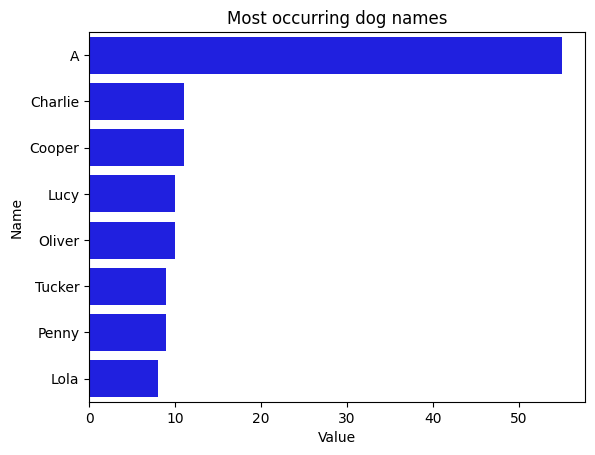

In [114]:
# put the names into a list
names = ['A','Charlie','Cooper' ,'Lucy','Oliver', 'Tucker','Penny', 'Lola']
value 

sns.barplot(x = value, y = names ,data = df_new,  
                  color = 'blue').set(xlabel ="Value", ylabel = "Name",title='Most occurring dog names');

# Saving the Seaborn Figure:
plt.savefig('most_occurring_dog_names.png')

'A' ('A' in itself might be a type or improperly recorded name) appears to be the most occurring name with a value of 55, followed by Charlie with a value of 12. 11 dogs were named Cooper ,Lucy, Oliver  repectively and also 10 dogs were named Tucker, Penny, Lola repectively.



### Some insights on the  Tweet sources
**Note:** The data upon which this insight/analysis was based on was cleaned.

In [115]:
# descriptive statistics of the various sources
df_new['source'].describe()

count                   2173
unique                     4
top       Twitter for iPhone
freq                    2041
Name: source, dtype: object

In [116]:
# value counts of the various sources 
df_new['source'].value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

***There are four tweet sources, namely :***

* Twitter for iPhone
* Vine - Make a Scene
* Twitter Web Client
* TweetDeck  
    
**There was a total of 2173 tweets made from all the sources combined.Among the sources , the top/most tweets were made from an iPhone with a total of 2041 tweets followed by Vine with a smaller value of 90,  the source with the least tweet made from was TweetDeck with a value of 11 and the last but not least source was from Twitter Web Client with a tweet value of 31**


### Visualization of the data above 

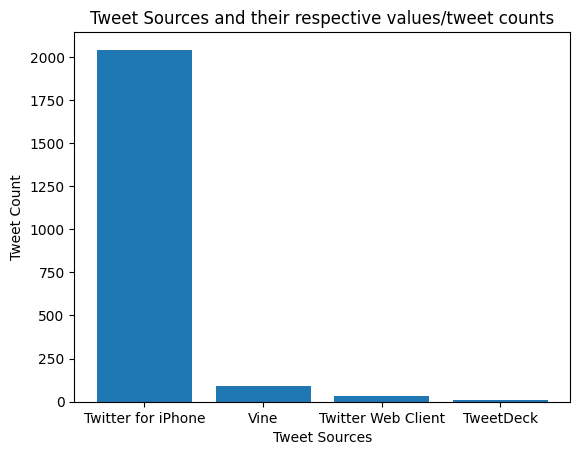

In [117]:
# put the respective values into a list
value = [2041,90,31 ,11]

# please note that the full words for 'Vine' is 'Vine - Make a Scene'.I shortened if for simplicity sake.
source =['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']


plt.bar(source, value)
plt.xlabel('Tweet Sources')
plt.ylabel('Tweet Count')
plt.title('Tweet Sources and their respective values/tweet counts') 

# Saving the Seaborn Figure:
plt.savefig('tweet_source_count.png')


### Some insights based on the tweet timestamp

**Note:** The data upon which this insight/analysis was based on was cleaned.

In [118]:
# descriptive statistics of the tweet timestamp 
df_copy_new['timestamp'].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_21352\2247742934.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy_new['timestamp'].describe()


count                    2173
unique                   2173
top       2017-08-01 16:23:56
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

In [119]:
df_new['timestamp'].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_21352\469976942.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_new['timestamp'].describe()


count                    2173
unique                   2173
top       2017-08-01 16:23:56
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

### There was a total of 2173 tweets. The top tweet was made on 1st August 2017, the first tweet was on 15th November, 2015 and the last on 1st August, 2017.